In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
df = pd.read_excel("./BenchmarkUddinSO-ConsoliatedAspectSentiment.xls")

In [3]:
print("Number of instances:", df.shape[0])

Number of instances: 4522


In [4]:
df.sample(5)

,thread,tid,sent,ManualLabel,codes,stakeholder,signal,intent,action
3410,267306,267306:12,"""Really, I just want to be able to send comman...",o,"[""'Others'""]",NaN,NaN,NaN,NaN
887,326390,326390:33,"""Some channels (SocketChannel) support non-blo...",o,"[""'Usability'""]",NaN,NaN,NaN,NaN
4160,1802915,1802915:43,"""In many (thou not all) cases you can use Char...",o,"[""'Usability'""]",NaN,NaN,NaN,NaN
3243,1688099,1688099:44,"""Which, if using the jsondriver and setting th...",p,"[""'Bug'""]",NaN,NaN,NaN,NaN
308,410890,410890:95,"""Is it non-null?Then highlight someObject.getS...",o,"[""'Others'""]",NaN,NaN,NaN,NaN


In [5]:
df.rename(columns={"thread": "id", "sent": "text"}, inplace=True)

In [6]:
def normalize(x):
    labels = [e.replace("'", "") for e in eval(x)]
    return {l: 1 for l in labels}

labels_df = pd.json_normalize(df["codes"].apply(normalize)).fillna(0)
labels_df.columns = ["label_" + c.lower() for c in labels_df.columns]
df = pd.concat([df, labels_df], axis=1)

### Clean the data:

In [7]:
print("Number of missing texts:", df["text"].isnull().sum())

Number of missing texts: 0


In [8]:
print("Number of missing Usability labels:", df["label_usability"].isnull().sum())
print("Number of missing Others labels:", df["label_others"].isnull().sum())
print("Number of missing OnlySentiment labels:", df["label_onlysentiment"].isnull().sum())
print("Number of missing Bug labels:", df["label_bug"].isnull().sum())
print("Number of missing Performance labels:", df["label_performance"].isnull().sum())
print("Number of missing Community labels:", df["label_community"].isnull().sum())
print("Number of missing Documentation labels:", df["label_documentation"].isnull().sum())
print("Number of missing Compatibility labels:", df["label_compatibility"].isnull().sum())
print("Number of missing Legal labels:", df["label_legal"].isnull().sum())
print("Number of missing Portability labels:", df["label_portability"].isnull().sum())
print("Number of missing Security labels:", df["label_security"].isnull().sum())

Number of missing Usability labels: 0
Number of missing Others labels: 0
Number of missing OnlySentiment labels: 0
Number of missing Bug labels: 0
Number of missing Performance labels: 0
Number of missing Community labels: 0
Number of missing Documentation labels: 0
Number of missing Compatibility labels: 0
Number of missing Legal labels: 0
Number of missing Portability labels: 0
Number of missing Security labels: 0


In [9]:
print(f"Number of duplicated texts: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts: 338 (7.47%)


*WARNING: Duplicated texts is particularly high.*

### Analyze distributions:

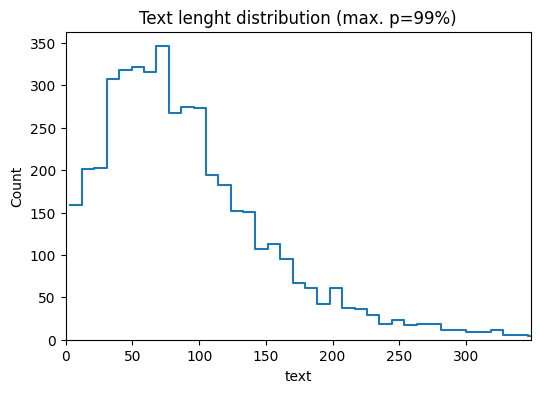

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df["text"].str.len(), element="step", fill=False)
plt.xlim([
    0,
    df["text"].str.len().quantile(.99)
])
plt.title("Text lenght distribution (max. p=99%)")
plt.show()

In [11]:
pd.concat([
    df[["label_usability"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Usability"),
    df[["label_others"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Others"),
    df[["label_onlysentiment"]].value_counts(dropna=False, normalize=True).round(2).to_frame("OnlySentiment"),
    df[["label_bug"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Bug"),
    df[["label_performance"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Performance"),
    df[["label_community"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Community"),
    df[["label_documentation"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Documentation"),
    df[["label_compatibility"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Compatibility"),
    df[["label_legal"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Legal"),
    df[["label_portability"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Portability"),
    df[["label_security"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Security")
], axis=1)

,Usability,Others,OnlySentiment,Bug,Performance,Community,Documentation,Compatibility,Legal,Portability,Security
0.0,0.68,0.62,0.92,0.96,0.92,0.98,0.94,0.98,0.99,0.98,0.96
1.0,0.32,0.38,0.08,0.04,0.08,0.02,0.06,0.02,0.01,0.02,0.04


In [12]:
df[[c for c in df.columns if c.startswith("label_")]].sum(axis=1).value_counts(normalize=True)

1.0    0.952455
2.0    0.046218
3.0    0.001327
Name: proportion, dtype: float64

### Persist datasets:

In [13]:
df[["id", "text"] + [c for c in df.columns if c.startswith("label_")]].to_parquet("./review_aspect.parquet", index=False)

In [14]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 4522
